In [41]:
import numpy as np
import pandas as pd

In [42]:
df = pd.read_csv("placement.csv")


In [43]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


### Steps

#### 0. Preprocess + EDA + Feature Selection
#### 1. Extract input and output cols
#### 2. Scale the values
#### 3. Train test split
#### 4. Train the model
#### 5. Evaluate the model/model selection
#### 6. Deploy the model
     

In [46]:
# Preprocess - removed unwanted column
df = df.iloc[:,1:]

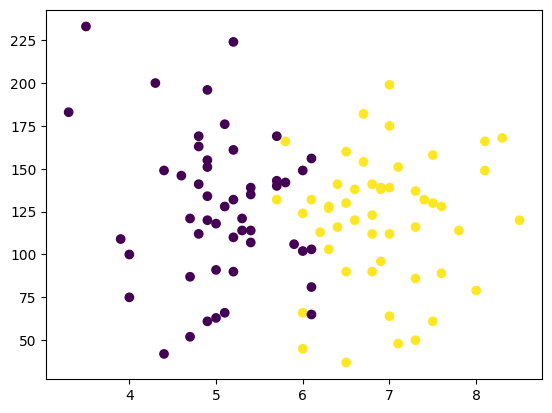

In [47]:
# Display Data - Data Visualization

import matplotlib.pyplot as plt

plt.scatter(df["cgpa"],df["iq"], c=df["placement"])

In [48]:
# Extracting Input and Output cols

input_x = df.iloc[:,0:2]
output_y = df.iloc[:,-1]

In [49]:
input_x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [50]:
output_y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [51]:
#Train test split
from sklearn.model_selection import train_test_split


In [52]:
x_train,  x_test, y_train, y_test = train_test_split(input_x,output_y,test_size=0.1)

In [53]:
x_train

,cgpa,iq
14,6.1,103.0
23,4.7,87.0
89,4.9,151.0
97,6.7,182.0
62,6.0,102.0
...,...,...
31,3.9,109.0
76,4.9,155.0
77,7.3,50.0
64,7.0,64.0


In [54]:
y_train

14    0
23    0
89    0
97    1
62    0
     ..
31    0
76    0
77    1
64    1
36    0
Name: placement, Length: 90, dtype: int64

In [55]:
x_test

,cgpa,iq
67,5.0,118.0
12,5.4,139.0
54,6.4,141.0
15,5.1,176.0
70,6.3,127.0
32,7.0,139.0
58,8.0,79.0
50,3.5,233.0
2,5.3,121.0
52,7.0,175.0


In [56]:
y_test

67    0
12    0
54    1
15    0
70    1
32    1
58    1
50    0
2     0
52    1
Name: placement, dtype: int64

In [57]:
# Scale

from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()

In [59]:
x_train = scaler.fit_transform(x_train)

In [60]:
x_train

array([[ 8.77382285e-02, -4.66576461e-01],
       [-1.15439849e+00, -8.76253354e-01],
       [-9.76950387e-01,  7.62454217e-01],
       [ 6.20082536e-01,  1.55620320e+00],
       [-9.85822792e-04, -4.92181267e-01],
       [ 8.77382285e-02,  8.90478246e-01],
       [ 2.21711546e+00, -3.12947626e-02],
       [ 7.08806587e-01, -7.99438936e-01],
       [ 1.32987495e+00, -1.54197830e+00],
       [ 8.77382285e-02,  2.75962907e-01],
       [ 9.74978741e-01, -1.87484078e+00],
       [ 5.31358485e-01,  4.29591742e-01],
       [ 7.08806587e-01, -2.36133209e-01],
       [ 1.76462280e-01, -2.10528403e-01],
       [ 1.41859900e+00,  1.73543684e-01],
       [ 4.42634433e-01, -7.99438936e-01],
       [-9.76950387e-01,  1.91467048e+00],
       [-1.24312254e+00,  6.34430188e-01],
       [-8.88226335e-01, -7.73834131e-01],
       [-1.06567444e+00, -2.36133209e-01],
       [ 1.41859900e+00, -8.25043742e-01],
       [-5.33330130e-01,  3.52777324e-01],
       [ 2.03966736e+00,  1.19773592e+00],
       [-1.

In [61]:
x_test= scaler.transform(x_test)

In [62]:
x_test

array([[-0.88822634, -0.08250437],
       [-0.53333013,  0.45519655],
       [ 0.35391038,  0.50640616],
       [-0.79950228,  1.40257436],
       [ 0.26518633,  0.14793888],
       [ 0.88625469,  0.45519655],
       [ 1.7734952 , -1.0810918 ],
       [-2.2190871 ,  2.86204829],
       [-0.62205418, -0.00568996],
       [ 0.88625469,  1.37696956]])

In [63]:
# Train model using logistic Regression

from sklearn.linear_model import LogisticRegression

In [68]:
clf = LogisticRegression()

In [70]:
clf.fit(x_train,y_train)

LogisticRegression()

In [72]:

y_pred = clf.predict(x_test)

In [73]:
y_test

67    0
12    0
54    1
15    0
70    1
32    1
58    1
50    0
2     0
52    1
Name: placement, dtype: int64

In [74]:
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [75]:
x_test

array([[-0.88822634, -0.08250437],
       [-0.53333013,  0.45519655],
       [ 0.35391038,  0.50640616],
       [-0.79950228,  1.40257436],
       [ 0.26518633,  0.14793888],
       [ 0.88625469,  0.45519655],
       [ 1.7734952 , -1.0810918 ],
       [-2.2190871 ,  2.86204829],
       [-0.62205418, -0.00568996],
       [ 0.88625469,  1.37696956]])

In [76]:
clf

LogisticRegression()

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
accuracy_score(y_test,y_pred)

1.0

In [80]:

from mlxtend.plotting import plot_decision_regions

<Axes: >

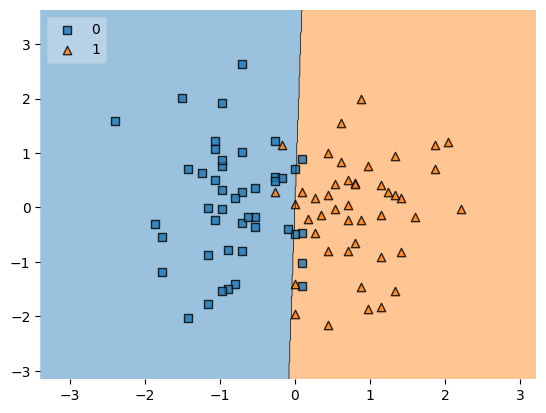

In [82]:

plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [83]:
import pickle

In [84]:
pickle.dump(clf,open('model.pkl','wb'))